ДЗ 1 Номер 1


1.Реализуйте метод дихотомии, метод золотого сечения и метод Фибоначчи.

2.Выберите произвольную несимметричную относительно некоторой вертикальной оси унимодальную функцию.

3.Cравните сходимость методов по времени и по числу итераций, необходимых для достижения заданной точности.

4.Проанализируйте результаты.

ссылка на оригинальный материал)) https://github.com/amkatrutsa/MIPT-Opt/blob/master/12-NumMethods/Seminar12.ipynb

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [10]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

9.313225746154785e-10


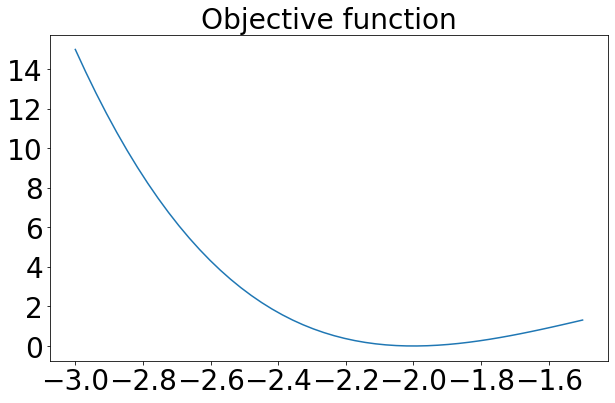

In [11]:
import numpy as np

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = -1.5
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

 ЗОЛОТОЕ СЕЧЕНИЕ

In [13]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

In [14]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

6.93889390875399e-18
9.549014390504221e-18
9.313225746154785e-10


Сравнение методов

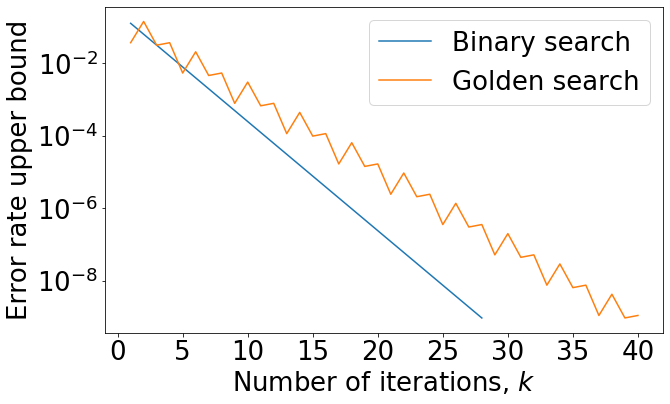

In [15]:
plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 26)
_ = plt.yticks(fontsize = 26)

In [16]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

27.4 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
177 µs ± 53.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Пример иного поведения методов

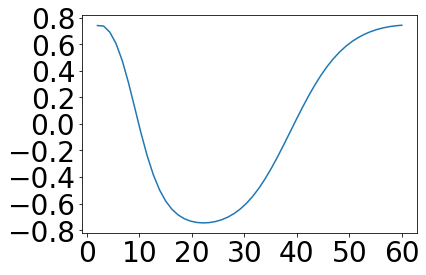

In [17]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-8
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

## Сравнение скорости сходимости и времени работы методов

### Метод дихотомии


In [18]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Метод золотого сечения

In [19]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Сходимость

Text(0, 0.5, 'Error rate upper bound')

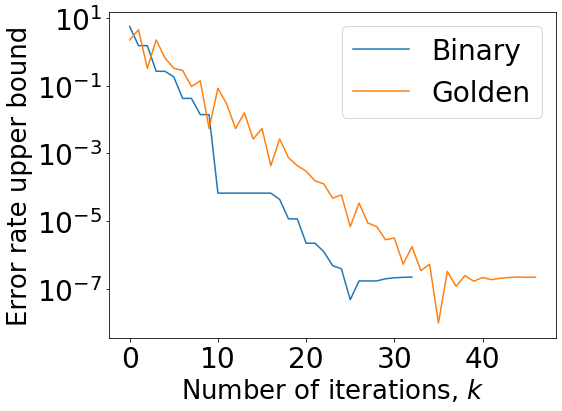

In [20]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=28)
plt.xticks(fontsize=28)
_ = plt.yticks(fontsize=28)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)

### Время работы

In [21]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

1.14 ms ± 577 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.03 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
